In [6]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import math
import numpy as np

In [29]:
df = pd.read_csv('steam_games_final_format.csv')

In [37]:
labels = list(df.columns)
del labels[0]
del labels[0]

In [59]:
model = KNeighborsClassifier(n_neighbors=3)
df_knn = df.drop(['name'], axis=1)
model.fit(df_knn, ["url"])

ValueError: could not convert string to float: 'https://store.steampowered.com/app/379720/DOOM/'

In [51]:
df_knn

,original_price,all_review_sentiment,all_review_sentiment_num,all_review_num,skateboarding,assassin,match 3,strategy,horror,dark comedy,...,czech,thai,norwegian,english,dutch,simplified chinese,arabic,portuguese,ukrainian,spanish - spain
0,19.99,9,39146,42550,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,29.99,1,409937,836608,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,1,1
2,39.99,3,4991,7030,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,44.99,1,101940,167115,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0.00,3,8495,11481,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40323,2.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40324,2.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40325,7.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40326,9.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
model.predict(df_knn.head(1))

NameError: name 'model' is not defined

Text(0, 0.5, 'SSE')

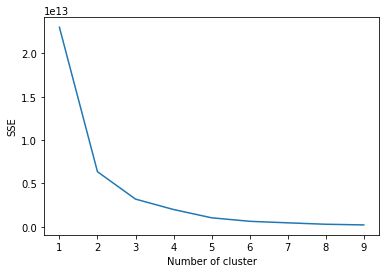

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

df = (pd.read_csv('steam_games_final_format.csv')).drop(['url', 'name'],axis=1)
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=10).fit(df)
    sse[k] = kmeans.inertia_


plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df)

In [19]:
item = []
for row in df.head(1).iterrows():
    item = row[1]
kmeans.predict([item])

/home/joefe/.local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca_result = pca.fit_transform(df)

In [27]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.55539676e-01 4.16073095e-02 2.85300088e-03 9.02099156e-09
 1.07958471e-09 4.24024715e-10 3.24432457e-10 2.24424224e-10
 1.95285241e-10 1.65179672e-10 1.56268231e-10 1.45515542e-10
 1.20469643e-10 1.03480002e-10 1.00931951e-10 9.19388841e-11
 8.30508151e-11 7.70525273e-11 7.18414239e-11 6.57258138e-11
 6.41912197e-11 5.69013001e-11 5.39897508e-11 4.97576984e-11
 4.74083619e-11 4.41397169e-11 4.18650805e-11 4.00725553e-11
 3.82973231e-11 3.73152037e-11 3.62553688e-11 3.10609079e-11
 2.82789185e-11 2.69430291e-11 2.48706617e-11 2.32531500e-11
 2.26735296e-11 2.18212468e-11 2.03764884e-11 1.87289207e-11
 1.82685030e-11 1.51245636e-11 1.46954165e-11 1.40587279e-11
 1.32739157e-11 1.20949080e-11 1.12910959e-11 1.04861383e-11
 1.00797796e-11 8.86314063e-12 7.91744703e-12 7.11221552e-12
 6.76159360e-12 5.08683547e-12 4.99037370e-12 4.77242978e-12
 4.60499498e-12 4.18989328e-12 4.16266029e-12 3.91511939e-12
 3.20384724e-12 3.18248505e-12 2.7995061

/tmp/ipykernel_98272/1369176588.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


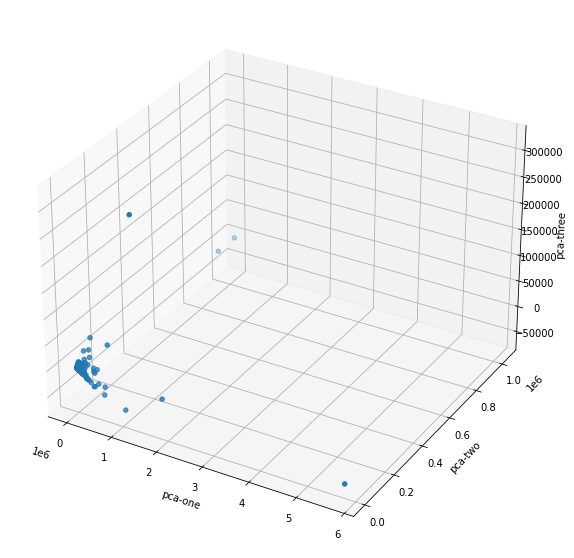

In [28]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

rndperm = np.random.permutation(df.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [45]:
df = pd.read_csv('steam_games_final_format.csv')

In [29]:
def distance(a, b):
    n = len(a)
    i = 0
    sum = 0
    while i < n:
        sum += ((a[i] - b[i])**2)
        i+=1
    return math.sqrt(sum)

In [33]:
from scipy import spatial


def calculate_cosine_distance(a, b):
    cosine_distance = float(spatial.distance.cosine(a, b))
    return cosine_distance


def calculate_cosine_similarity(a, b):
    cosine_similarity = 1 - calculate_cosine_distance(a, b)
    return cosine_similarity

In [46]:
item = []
for i in df.head(1).iterrows():
    item = np.asarray(i[1][2:], dtype=np.float32)
idx = 0
result = []
for i in df.iterrows():
    idx += 1
    if idx % 5000 == 0:
        print(((idx + 1) / 40328) * 100, "%")
        #np.sqrt(np.sum((np.asarray(i[1][2:], dtype=np.float32) - item) ** 2))
    result.append({"name": i[1][1], "url": i[1][0], "dist": calculate_cosine_distance(i[1][2:], item) })   

/home/joefe/.local/lib/python3.9/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


12.400813330688356 %
24.79914699464392 %
37.19748065859949 %
49.59581432255505 %
61.99414798651062 %
74.39248165046618 %
86.79081531442175 %
99.1891489783773 %


In [47]:
result.sort(key=lambda x: x["dist"], reverse=False)

In [48]:
result

[{'name': 'Substance Painter 2019',
  'url': 'https://store.steampowered.com/app/978680/Substance_Painter_2019/',
  'dist': 0.0},
 {'name': 'VEGAS Movie Studio 15 Platinum Steam Edition',
  'url': 'https://store.steampowered.com/app/785170/VEGAS_Movie_Studio_15_Platinum_Steam_Edition/',
  'dist': 0.0},
 {'name': 'Movavi Video Editor 15 Plus',
  'url': 'https://store.steampowered.com/app/969020/Movavi_Video_Editor_15_Plus/',
  'dist': 0.0},
 {'name': 'OVRdrop',
  'url': 'https://store.steampowered.com/app/586210/OVRdrop/',
  'dist': 0.0},
 {'name': 'VEGAS Pro 16 Edit Steam Edition',
  'url': 'https://store.steampowered.com/app/883140/VEGAS_Pro_16_Edit_Steam_Edition/',
  'dist': 0.0},
 {'name': 'RealityCapture',
  'url': 'https://store.steampowered.com/app/489180/RealityCapture/',
  'dist': 0.0},
 {'name': 'Mixcraft 8 Home Studio',
  'url': 'https://store.steampowered.com/app/218760/Mixcraft_8_Home_Studio/',
  'dist': 0.0},
 {'name': 'VEGAS Movie Studio 15 Platinum + SOUND FORGE Audio St